In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## DATA LOADING

In [6]:
# Import dataset
df=pd.read_csv(r"C:\Users\HP\Downloads\exam_score_prediction\Exam_Score_Prediction.csv")
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


## DATA CLEANING AND PREPROCESSING

In [8]:
# Convert categorical columns to numerical using label encoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_cols = ['gender', 'course', 'internet_access','sleep_quality','study_method','facility_rating','exam_difficulty']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le   # store encoder


In [9]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,1,6,2.78,92.9,1,7.4,2,0,1,1,58.9
1,2,23,2,5,3.37,64.8,1,4.6,0,3,2,2,54.8
2,3,22,1,1,7.88,76.8,1,8.5,2,0,0,2,90.3
3,4,20,2,6,0.67,48.4,1,5.8,0,3,1,2,29.7
4,5,20,0,6,0.89,71.6,1,9.8,2,0,1,2,43.7


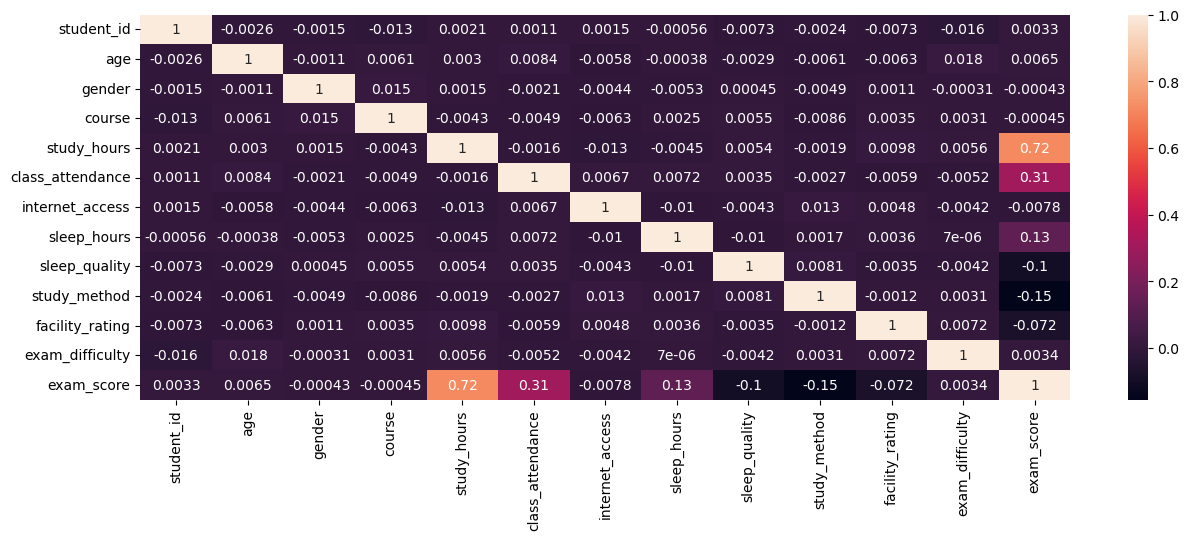

In [10]:
# To find correlation between the variables
corr = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
# Drop non correlated columns
df.drop('exam_difficulty',axis=1,inplace=True)
df.drop('student_id',axis=1,inplace=True)
df.drop('age',axis=1,inplace=True)
df.drop('course',axis=1,inplace=True)

In [12]:
df.head()

,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_score
0,1,2.78,92.9,1,7.4,2,0,1,58.9
1,2,3.37,64.8,1,4.6,0,3,2,54.8
2,1,7.88,76.8,1,8.5,2,0,0,90.3
3,2,0.67,48.4,1,5.8,0,3,1,29.7
4,0,0.89,71.6,1,9.8,2,0,1,43.7


## EXPLORATORY DATA ANALYSIS

### SCATTER PLOT

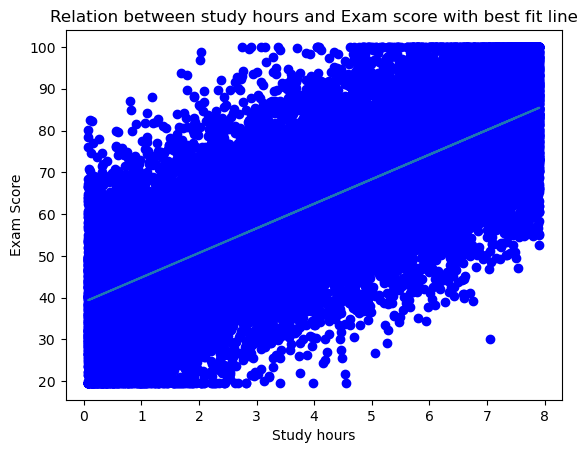

In [47]:
# Scatter plot for analysing the relation between study hours and Exam score
x=df['study_hours']
y= df['exam_score']
plt.scatter(x, y, color='blue', marker = 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel('Study hours')
plt.ylabel('Exam Score')
plt.title('Relation between study hours and Exam score with best fit line')
plt.show()

### HISTOGRAM

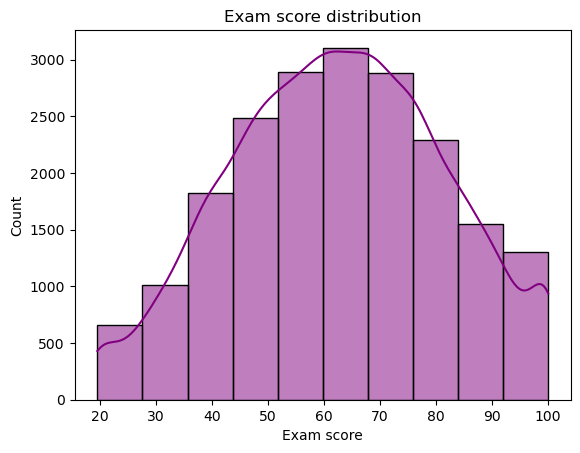

In [48]:
# Exam score distribution

sns.histplot(df['exam_score'],bins = 10, kde = True, color = 'purple')
plt.xlabel('Exam score')
plt.ylabel('Count')
plt.title('Exam score distribution')
plt.show()

### PIE PLOT

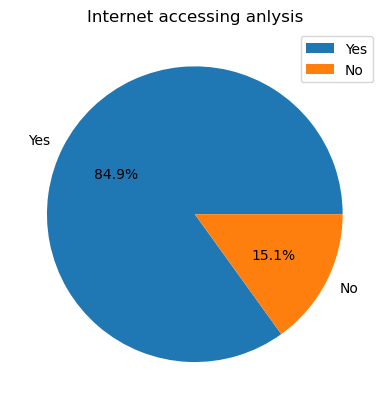

In [57]:
# Relation between Internet accessing analysis 
labels= ['Yes','No']
count = df['internet_access'].value_counts()
plt.pie(count,labels=labels,autopct='%1.1f%%')
plt.legend()
plt.title('Internet accessing analysis')
plt.show()

## TRAIN TEST SPLIT


In [13]:
# Split the whole dataset to X and y to train the model
X = df.drop('exam_score',axis=1)
X.head()

,gender,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating
0,1,2.78,92.9,1,7.4,2,0,1
1,2,3.37,64.8,1,4.6,0,3,2
2,1,7.88,76.8,1,8.5,2,0,0
3,2,0.67,48.4,1,5.8,0,3,1
4,0,0.89,71.6,1,9.8,2,0,1


In [14]:
y = df['exam_score']
y.head()

0    58.9
1    54.8
2    90.3
3    29.7
4    43.7
Name: exam_score, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

## MODELLING

### LINEAR REGRESSION

In [16]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred =model_LR.predict(X_test)

In [18]:
# To check the accuracy of Linear Regression Model
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)


R² score: 0.6735781037072114


### Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
y_pred = model_RFR.predict(X_test)

In [21]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.692940585053712


### SVR

In [22]:
from sklearn.svm import SVR
model_SVR = SVR()
model_SVR.fit(X_train,y_train)

SVR()

In [23]:
y_pred = model_SVR.predict(X_test)

In [24]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.6008981918395595


### KNeighbors Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
model_KNR = KNeighborsRegressor()
model_KNR.fit(X_train,y_train)

KNeighborsRegressor()

In [26]:
y_pred = model_KNR.predict(X_test)

In [27]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.6275113034179658


### MLP Regressor

In [28]:
from sklearn.neural_network import MLPRegressor
model_MLPR = MLPRegressor()
model_MLPR.fit(X_train,y_train)

MLPRegressor()

In [29]:
y_pred = model_MLPR.predict(X_test)

In [30]:
r2 = r2_score(y_test, y_pred)
print("R² score:", r2)

R² score: 0.7199254421012038


<p> The objective of this project was to predict/classify Exam Score using Exam_Score_Prediction dataset and identify the most suitable machine learning model.Multiple models including Linear Regression,  Random Forest, MLP Regressor, KNeighbors Regressor and Support Vector Machine were trained and evaluated.Models were evaluated using r2 score on the test dataset. The MLP Regressor model showed the highest R² value (0.72), indicating better predictive performance. Hence, it is selected as the best-fit model for this project and is recommended for deployment.</p>